In [2]:
import pandas as pd

csv_file = 'QUBOClusteringData.csv'

df = pd.read_csv(csv_file)

df.head()

,tsolve,alg,nvars,seed,runseed
0,8.0,UEDA,5,1,1
1,7.0,GR,5,1,1
2,13.0,RS,5,1,1
3,73.0,UEDA,5,1,2
4,4.0,GR,5,1,2


In [14]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

# data prep

fill_value = -1  # Setzen Sie hier einen geeigneten Wert für die Füllung ein
df['tsolve_filled'] = df['tsolve'].fillna(value=fill_value)

df_with_solution = df[df['tsolve_filled'].notnull()]

features = ['nvars', 'seed', 'runseed']

# training

X_train, X_test, y_train, y_test = train_test_split(df_with_solution[features], df_with_solution['tsolve_filled'], test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

# prediction

predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


rechtszensierte_daten = df[df['tsolve'].isnull()][features]
rechtszensierte_daten_filled = rechtszensierte_daten.fillna(value=fill_value)
rechtszensierte_vorhersagen = model.predict(rechtszensierte_daten_filled)

df.loc[df['tsolve'].isnull(), 'predicted_tsolve'] = rechtszensierte_vorhersagen



Mean Squared Error: 74534.73459875393


In [28]:
df

,tsolve,alg,nvars,seed,runseed,tsolve_filled,has_solution,predicted_tsolve
0,8.0,UEDA,5,1,1,8.0,1,NaN
1,7.0,GR,5,1,1,7.0,1,NaN
2,13.0,RS,5,1,1,13.0,1,NaN
3,73.0,UEDA,5,1,2,73.0,1,NaN
4,4.0,GR,5,1,2,4.0,1,NaN
...,...,...,...,...,...,...,...,...
7795,93.0,GR,30,10,9,93.0,1,NaN
7796,NaN,RS,30,10,9,-1.0,0,287.585358
7797,681.0,UEDA,30,10,10,681.0,1,NaN
7798,82.0,GR,30,10,10,82.0,1,NaN


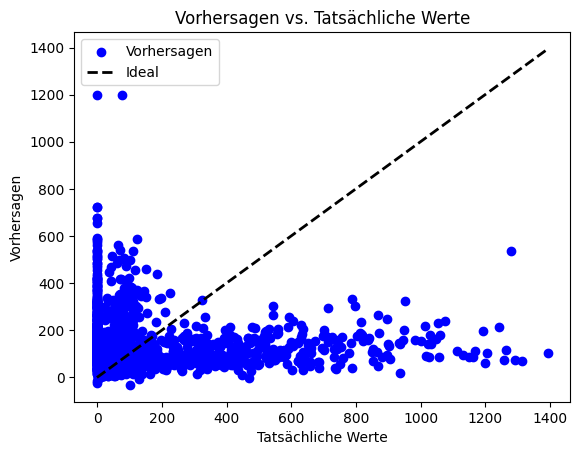

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, c='blue', label='Vorhersagen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', linewidth=2, label='Ideal')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagen')
plt.title('Vorhersagen vs. Tatsächliche Werte')
plt.legend()
plt.show()


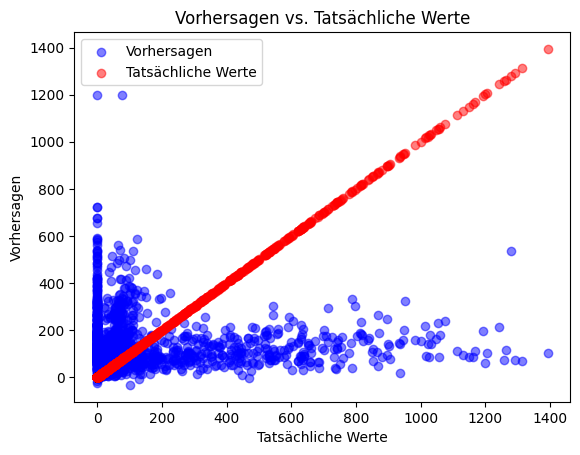

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, c='blue', label='Vorhersagen', alpha=0.5) 
plt.scatter(y_test, y_test, c='red', label='Tatsächliche Werte', alpha=0.5) 
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagen')
plt.title('Vorhersagen vs. Tatsächliche Werte')
plt.legend()
plt.show()


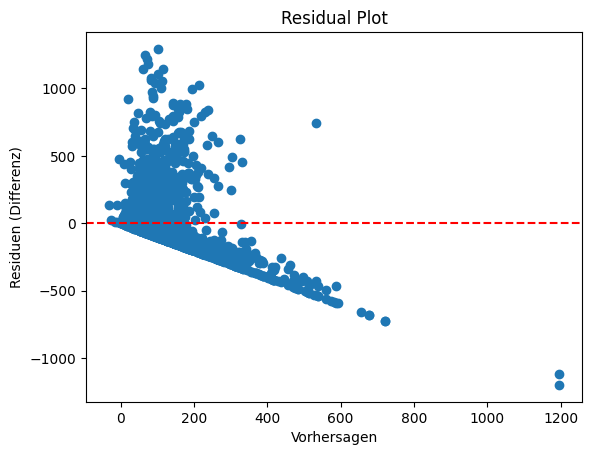

In [17]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Vorhersagen')
plt.ylabel('Residuen (Differenz)')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()


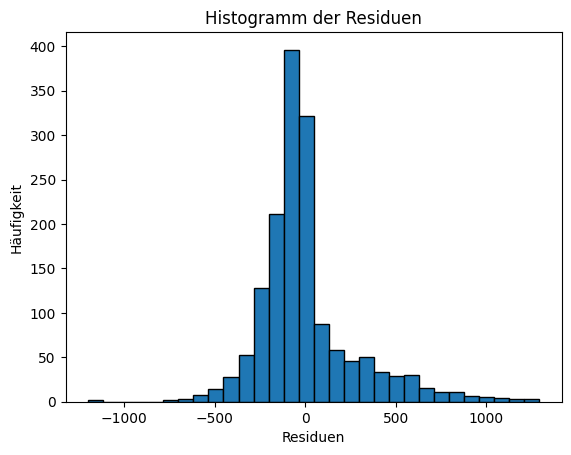

In [18]:
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuen')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Residuen')
plt.show()


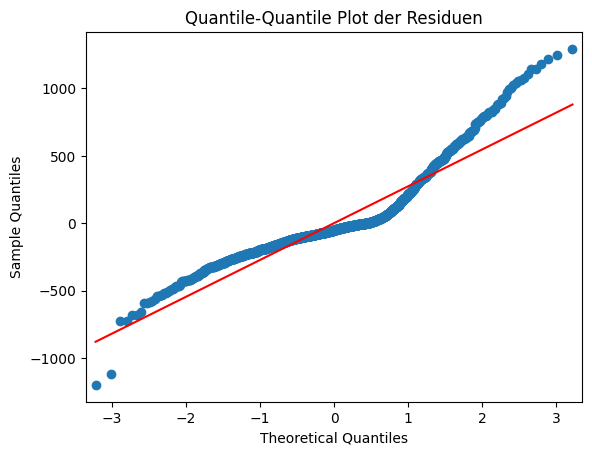

In [19]:
import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.title('Quantile-Quantile Plot der Residuen')
plt.show()

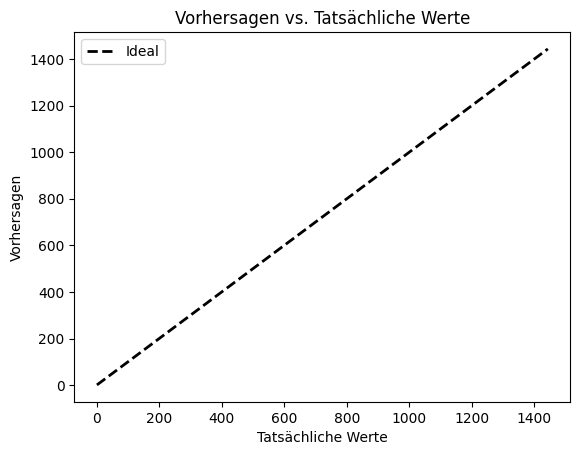

In [15]:
import matplotlib.pyplot as plt

# Sortieren Sie die Daten nach den tatsächlichen Werten für eine klare Darstellung
df_sorted = df.sort_values(by='tsolve')

# Scatter Plot der tatsächlichen Werte gegen die Vorhersagen
plt.scatter(df_sorted['tsolve'], df_sorted['predicted_tsolve'], alpha=0.5)
plt.plot([df_sorted['tsolve'].min(), df_sorted['tsolve'].max()], [df_sorted['tsolve'].min(), df_sorted['tsolve'].max()], '--k', linewidth=2, label='Ideal')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagen')
plt.title('Vorhersagen vs. Tatsächliche Werte')
plt.legend()
plt.show()



In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 74534.73459875393
R² Score: -0.2716773034693316
